In [1]:
# Python 3.7.0
# Required imports
import pandas as pd
import matplotlib.pyplot as pyplot
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statistics
import sklearn
import numpy as np
from keras import metrics
import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Deep learning model creator
def my_model():
    model = Sequential()
    model.add(Dense(13, input_dim=2, activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, kernel_initializer='normal'))
    # compile the keras model
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[metrics.mean_absolute_error])
    return model

In [3]:
# Read data
data = pd.read_csv("data.csv", sep=",")

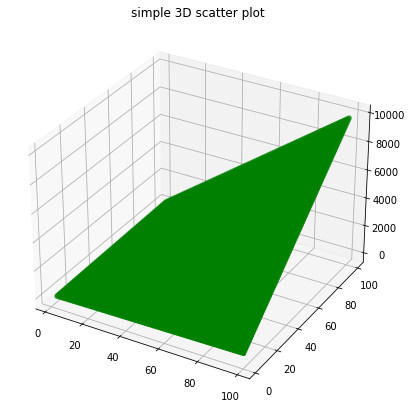

In [4]:
# Plot data
fig = pyplot.figure(figsize=(10, 7))
ax = pyplot.axes(projection="3d")

# Creating plot
ax.scatter3D(data["x"], data["y"], data["result"], color="green")
pyplot.title("simple 3D scatter plot")

# show plot
pyplot.show()

In [4]:
# Split data 
predict = "result"

# Divide data into train and test splits
X = np.array(data.drop([predict], 1))
Y = np.array(data[predict])
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split( X,Y, test_size=0.1 )

In [ ]:
# 5 fold cross validation for deep learning model
kf = KFold(n_splits=5,shuffle=True,random_state=False)
mses = []

for train_index, val_index in kf.split(x_train):
    model = my_model()
    training_x = x_train[train_index]
    training_y = y_train[train_index]
    validation_x = x_train[val_index]
    validation_y = y_train[val_index]

    model.fit(training_x, training_y, epochs=75, batch_size=10)
    _, mse = model.evaluate(validation_x, validation_y)
    mses.append(mse)
print("\n Mean absolute error of 5 fold cross validation score in deep learning model: ",statistics.mean(mses))

In [ ]:
# Train deep learning model for 75 epochs then test it on test data and save the model.
model = my_model()
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=75, batch_size=10)
# evaluate the keras model
_, mse = model.evaluate(x_test, y_test)
print('Mean absolute error of the deep learning model on test data: %f' % mse)

model.save("my_model")

In [5]:
# Load directly the model I saved if you want and test it 
model = keras.models.load_model("model_333")
_, mse = model.evaluate(x_test, y_test)
print('Mean absolute error of the deep learning model on test data: %f' % mse)

31/31 [==============================] - 9s 1ms/step - loss: 52.1006 - mean_absolute_error: 52.1006
Mean absolute error of the deep learning model on test data: 52.100567


In [6]:
# 5 fold cross validation for decision tree model
print("Mean absolute error of 5 fold cross validation score in decision tree: ", -cross_val_score(DecisionTreeRegressor(), x_train, y_train, scoring='neg_mean_absolute_error', cv=5).mean())

Mean absolute error of 5 fold cross validation score in decision tree:  40.41888374783112


In [7]:
# Train and test decision tree model
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_predicted = dt.predict(x_test)
print("Mean absolute error of the decision tree model on test data ",sklearn.metrics.mean_absolute_error(y_test,dt_predicted))

Mean absolute error of the decision tree model on test data  36.70551508844953


In [8]:
# 5 fold cross validation for knn model
print("Mean absolute error of 5 fold cross validation score in knn:  ", -cross_val_score(KNeighborsRegressor(n_neighbors=1), x_train, y_train, scoring='neg_mean_absolute_error', cv=5).mean())

Mean absolute error of 5 fold cross validation score in knn:   50.569092737184846


In [9]:
# Train and test knn model
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train,y_train)
knn_predicted = knn.predict(x_test)
print("Mean absolute error of the knn model on test data",sklearn.metrics.mean_absolute_error(y_test,knn_predicted))

Mean absolute error of the knn model on test data 50.66493236212279


In [16]:
# Some handmade test examples for models
print("17.4 * 23.9 = 415.86")
print("Decision tree       ",dt.predict([[17.4,23.9]])[0])
print("KNN                 ",knn.predict([[17.4,23.9]])[0])
print("Deep learning model ",model.predict([[17.4,23.9]]).mean())

print()
print("52.3 * 98.1 = 5130.63")
print("Decision tree       ",dt.predict ([[52.3,98.1]])[0])
print("KNN                 ",knn.predict([[52.3,98.1]])[0])
print("Deep learning model ",model.predict([[52.3,98.1]]).mean())

print()
print("200 * 300 = 60000")
print("Decision tree       ",dt.predict([[200,300]])[0])
print("KNN                 ",knn.predict([[200,300]])[0])
print("Deep learning model ",model.predict([[200,300]]).mean())


17.4 * 23.9 = 415.86
Decision tree        408.0
KNN                  408.0
Deep learning model  371.7543

52.3 * 98.1 = 5130.63
Decision tree        5096.0
KNN                  5096.0
Deep learning model  5101.414

200 * 300 = 60000
Decision tree        9801.0
KNN                  9801.0
Deep learning model  33560.332
